## Univariate roc-auc or mse (or any other metric really)

The way this procedure works: Build one **decision tree per feature**, to predict the target! Make predictions using the **decision tree and the mentioned feature! Measure the **performance of that prediction**, be it the **roc-auc, the mse, or any other metric**! **Rank the features** according to the machine learning metric (roc-auc or mse)! **Select the highest ranking features**!

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

## Classification

In [7]:
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [8]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to select the features by **examining only the training set** to **avoid overfit!**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Determine univariate roc-auc for each feature!

In [10]:
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()  # train a decision tree classifier
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].to_frame()) # obtain the predictions
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1])) # calculate and store the roc-auc
roc_values[0:10]  # display the result

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

Capture the **roc-auc values** in a pandas series! **Add the variable names** in the index! **Sort the features** based on the **roc-auc**! Then **plot!**

Text(0, 0.5, 'roc-auc')

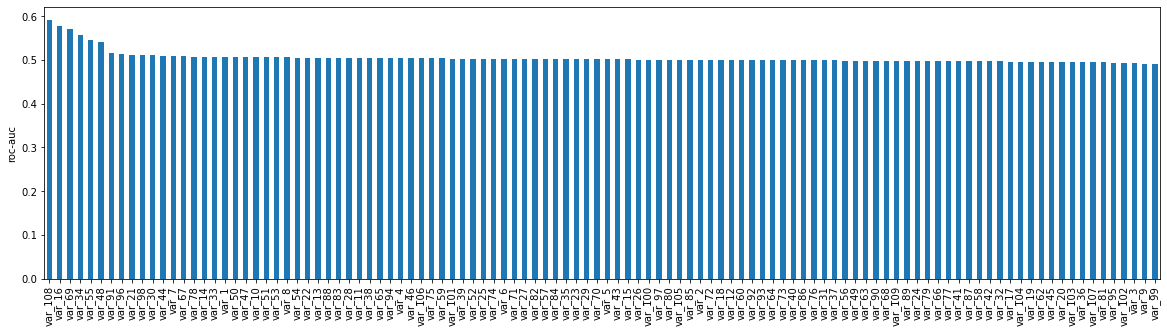

In [11]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

**A roc auc value of 0.5 indicates random decision!** Check how many features show a roc-auc value higher than random!

In [12]:
len(roc_values[roc_values > 0.5])

67

67 of 108  features show a predictive performance higher than 0.5. You can, of course, **tune the parameters of the Decision Tree** to get **better predictions** and thus, more reliable metrics.

### Select features with roc-auc > 0.5

In [13]:
selected_features = roc_values[roc_values > 0.5].index
selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

**Select features in the dataframes!**

In [15]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_train.shape, X_test.shape

((35000, 67), (15000, 67))

## Regression

In [27]:
data = pd.read_excel('HousingPrices.xls')
data.shape

(2919, 81)

**In practice, **feature selection should be done after data pre-processing**, so ideally, **all the categorical variables are encoded into numbers**, and then you can assess **how deterministic they are of the target!** Here for simplicity I will use only numerical variables! Select numerical columns:*

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(2919, 38)

In [31]:
data.dropna(inplace=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((784, 37), (337, 37))

### Determine univariate mse for each feature!

In [33]:
mse_values = []  # Here store the mse values
for feature in X_train.columns:
    clf = DecisionTreeRegressor()  # train a decision tree
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())  # make a prediction
    mse_values.append(mean_squared_error(y_test, y_scored)) # determine the mse and store it
mse_values[0:10]  # display the result

[13156441783.175074,
 4708943257.960143,
 6076214054.559766,
 8659224455.961088,
 2197824218.493682,
 5459571331.988261,
 4045431498.27819,
 4637435968.43587,
 7481982209.466766,
 6518482072.716259]

**Capture the mse values in a pandas series! Add the variable names in the index! Sort the features based on the mse! Plot!**

<AxesSubplot:>

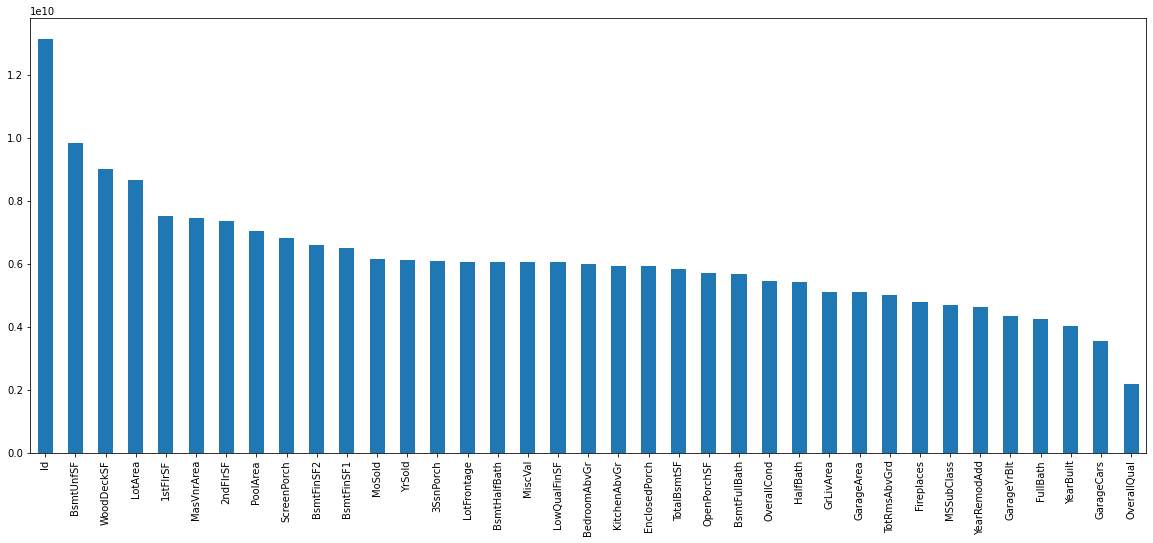

In [34]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

Remember that for regression, **the smaller the mse, the better the model performance is**. To select features, we need a **threshold, or cut-off**. To follow Scikit-learn selection implementation, which we will discuss in coming notebooks, we will select those features which mse is below the mean mse.

### Select features

In [35]:
selected_features = mse_values[mse_values < np.mean(mse_values)].index
selected_features

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'MiscVal'],
      dtype='object')

**Select features in the dataframes!M**

In [36]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_train.shape, X_test.shape

((784, 24), (337, 24))

Use this method in the projects, particularly when you have **an enormous amount of features** and  start **reducing the feature space quickly**. You can see an example use case in [my talk at pydata London](https://www.youtube.com/watch?v=KHGGlozsRtA)